In [498]:
import numpy as np
import matplotlib.pyplot as plt

In [499]:
import matplotlib
print(matplotlib.__version__)

3.3.4


In [532]:
class Bsplines_bases:
    """
    implemented based on De Boor's Algorithm outlined in 
    https://en.wikipedia.org/wiki/De_Boor%27s_algorithm
    """
    
    def __init__(self, x, knot_points, spline_degree = 3):
        self.x = x
        self.knot_points = knot_points
        self.spline_degree = spline_degree
        
    def add_knots(self):
        """
        prepend (and append) p=(spline_degree) knot points before (and after)
        """
        pre = [self.knot_points[0]] * self.spline_degree
        post = [self.knot_points[-1]] * self.spline_degree
        
        self.knot_points = pre + self.knot_points
        self.knot_points += post 
            
    
    def compute_bases(self, x, i, p):
        """
        compute the highest degree basis by control point indexed by i
        """
        #base case
        if p == 0:
            # check if x falls within the left-closed interval
            if (x >= self.knot_points[i]) and (x < self.knot_points[i+1]):
                return 1
            else:
                return 0
            
        #induction step
        if (self.knot_points[i+p+1] != self.knot_points[i+1]) and (self.knot_points[i+p] == self.knot_points[i]):
            
            # we are at the first B-spline
            alpha_2 = (self.knot_points[i+p+1]-x)/(self.knot_points[i+p+1] - self.knot_points[i+1])
            return alpha_2*self.compute_bases(x,i+1,p-1)
        
        if (self.knot_points[i+p] != self.knot_points[i]) and (self.knot_points[i+p+1] == self.knot_points[i+1]):
            
            # we are at the last B-spline
            alpha_1 = (x-self.knot_points[i])/(self.knot_points[i+p] - self.knot_points[i])
            return alpha_1*self.compute_bases(x,i,p-1)
            
        if (self.knot_points[i+p] == self.knot_points[i]) and (self.knot_points[i+p+1] == self.knot_points[i+1]):
            return 0
        alpha_1 = (x-self.knot_points[i])/(self.knot_points[i+p] - self.knot_points[i])
        alpha_2 = (self.knot_points[i+p+1]-x)/(self.knot_points[i+p+1] - self.knot_points[i+1])
               
        return alpha_1*self.compute_bases(x,i,p-1) + alpha_2*self.compute_bases(x,i+1,p-1)
    
    def collect_bases(self):
        """
        main function to run
        """
        self.add_knots()
        basis_functions_list = []
        
        for i in range(len(self.knot_points)-(self.spline_degree+1)):
            basis_function = self.compute_bases(self.x, i, self.spline_degree)
            basis_functions_list.append(basis_function)
            
        return basis_functions_list
    
    
class Bspline_plots:
    
    def __init__(self, x_list, knot_points, spline_degree = 3):
        self.x_list = x_list
        self.knot_points = knot_points
        self.spline_degree = spline_degree
    
    def prepare_bases_for_plotting(self):
        """
        This function organises the output of the algorithm by basis function
        """
        
        basis_dict = {}
        # initialise basis_dict: There should be (no. of knot points - order of polynomial) bases
        no_of_bases = len(self.knot_points) + 2*(self.spline_degree) - (self.spline_degree + 1)
        for b in range(no_of_bases):
            basis_dict[b] = []
        
        for j in self.x_list:
            BS = Bsplines_bases(j, self.knot_points, self.spline_degree)
            BS_val = BS.collect_bases()
            for base in range(len(BS_val)):
                basis_dict[base].append(BS_val[base])
                
        return basis_dict 
    
    def plot_bases(self):
        """
        This function plots the basis functions computed by the algorithm
        """
        basis_dict = self.prepare_bases_for_plotting()
        
        for key,base in basis_dict.items():
            plt.plot(self.x_list, basis_dict[key], label='$B_{%s,%s}(x)$'%(key,self.spline_degree))
            
        plt.legend(bbox_to_anchor=(1, 1.05))
        plt.title('Bspline Basis Functions, \n Polynomial degree = %s'%self.spline_degree)
        return


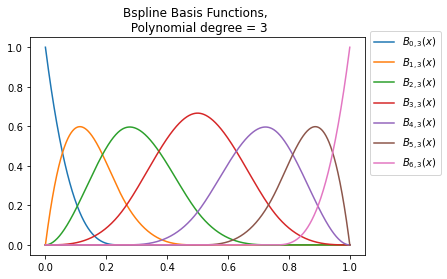

In [535]:
# knots = [0,1,2,3,4,5]
knots = [0,1/4,2/4,3/4,1]
x_list = np.linspace(0,0.99999,1000)

plots = Bspline_plots(x_list, knots, spline_degree=3)

plots.plot_bases()


# basis_dict = {
#     0:[],
#     1:[],
#     2:[],
#     3:[],
#     4:[],
#     5:[],
#     6: [],
#     7: []
# }

# for j in x_list:
#     BS = Bsplines_bases(j, knots)
#     BS_val = BS.collect_bases()
#     basis_dict[0].append(BS_val[0])
#     basis_dict[1].append(BS_val[1])
#     basis_dict[2].append(BS_val[2])
#     basis_dict[3].append(BS_val[3])
#     basis_dict[4].append(BS_val[4])
#     basis_dict[5].append(BS_val[5])
#     basis_dict[6].append(BS_val[6])
#     basis_dict[7].append(BS_val[7])

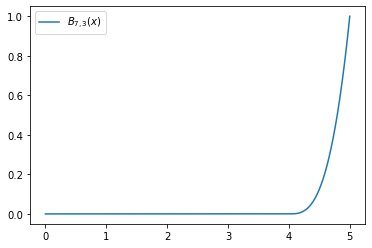

In [509]:
plt.plot(x_list,basis_dict[7], label='$B_{%s,3}(x)$'%7)

plt.legend()

KeyError: '%s,3'

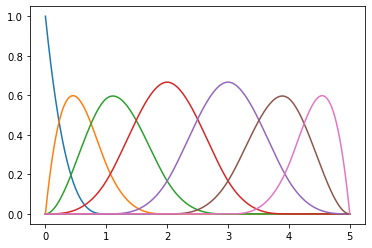

In [505]:
plt.plot(x_list,basis_dict[0], label = '$B_{0,3}(x)$')
plt.plot(x_list,basis_dict[1], label='$B_{1,3}(x)$')
plt.plot(x_list,basis_dict[2], label='$B_{2,3}(x)$')
plt.plot(x_list,basis_dict[3], label='$B_{3,3}(x)$')
plt.plot(x_list,basis_dict[4], label='$B_{4,3}(x)$')
plt.plot(x_list,basis_dict[5], label='$B_{5,3}(x)$')
plt.plot(x_list,basis_dict[6], label='$B_{6,3}(x)$')
plt.plot(x_list,basis_dict[7], label='$B_{%s,3}(x)$'.format(7))

plt.legend(bbox_to_anchor=(1, 1.05))

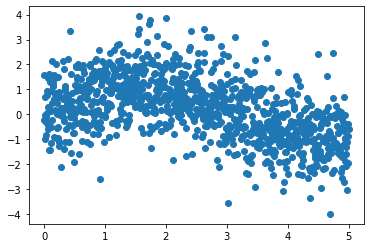

In [439]:
y_list = np.sin(x_list) + np.random.normal(loc=0.0, scale=1.0, size= len(x_list))

plt.scatter(x_list, y_list)

In [448]:
phi_matrix = np.empty((0,8))

In [451]:
for j in x_list:
    BS = Bsplines_bases(j, knots)
    BS_val = BS.collect_bases()
    phi_matrix = np.vstack((phi_matrix, BS_val))

In [461]:
theta_hat = np.linalg.inv(phi_matrix.T @ phi_matrix) @ (phi_matrix.T @ y_list)

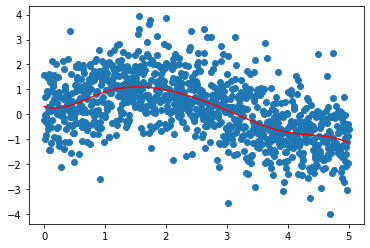

In [470]:
plt.scatter(x_list, y_list)
plt.plot(x_list, phi_matrix@theta_hat, c='red')

In [474]:
len(y_list2)

1000

In [489]:
x_list2 = np.linspace(0,4.9999,20)
y_list2 = np.cos(x_list2) #+ np.random.normal(loc=0.0, scale=2, size= len(x_list2))

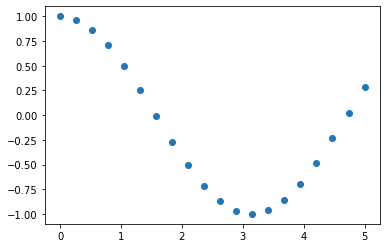

In [490]:
plt.scatter(x_list2, y_list2)

In [491]:
phi_matrix2 = np.empty((0,8))

In [492]:
for j in x_list2:
    BS = Bsplines_bases(j, knots)
    BS_val = BS.collect_bases()
    phi_matrix2 = np.vstack((phi_matrix2, BS_val))

In [493]:
theta_hat2 = np.linalg.inv(phi_matrix2.T @ phi_matrix2) @ (phi_matrix2.T @ y_list2)

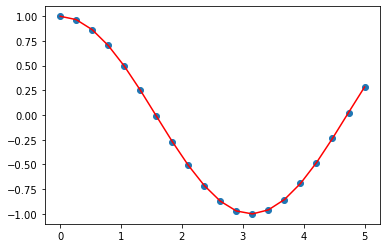

In [494]:
plt.scatter(x_list2, y_list2)
plt.plot(x_list2, phi_matrix2@theta_hat2, c='red')